Importing Libraries

In [1]:
from tkinter import *
from PIL import ImageGrab
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from emnist import extract_training_samples, extract_test_samples

Loading and splitting the data

In [2]:
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')
print(type(x_train))

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))

<class 'numpy.ndarray'>
99840
24960


Normalizing the data

In [3]:
x_train = x_train / 255.0  
x_test = x_test / 255.0

y_train = y_train - 1  
y_test = y_test - 1

Creating ANN layers

In [40]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(784, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26, activation="softmax"))

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,098,922 (4.19 MB)

 Trainable params: 1,095,946 (4.18 MB)

 Non-trainable params: 2,976 (11.62 KB)

Fitting the model

Epoch 1/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9493 - loss: 0.1312
Epoch 2/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9521 - loss: 0.1252
Epoch 3/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9551 - loss: 0.1162
Epoch 4/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9560 - loss: 0.1118
Epoch 5/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9589 - loss: 0.1044
Epoch 6/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9574 - loss: 0.1029
Epoch 7/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9612 - loss: 0.0962
Epoch 8/8
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9620 - loss: 0.0949


KeyError: 'val_accuracy'

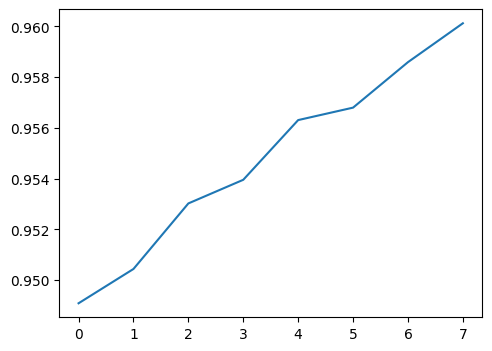

In [46]:
model.fit(x_train,y_train,epochs=8, batch_size=50)

In [47]:
model.save('alphabets_batchNormalized_001.keras')

Evaluating the model

In [48]:
alpha_model=load_model('alphabets_batchNormalized_001.keras')
test_loss, test_accuracy = alpha_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9209 - loss: 0.2965
Test Loss: 0.2920, Test Accuracy: 0.9219


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
				  The letter is probably:
						' B '


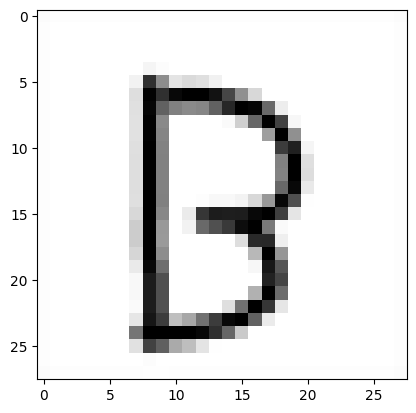

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
				  The letter is probably:
						' C '


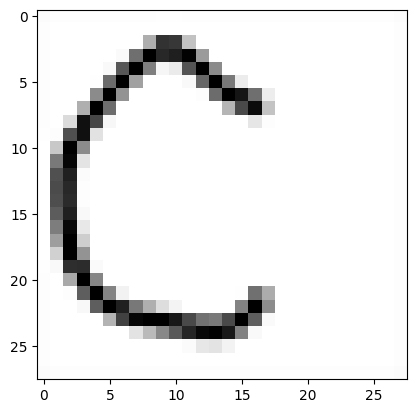

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
				  The letter is probably:
						' D '


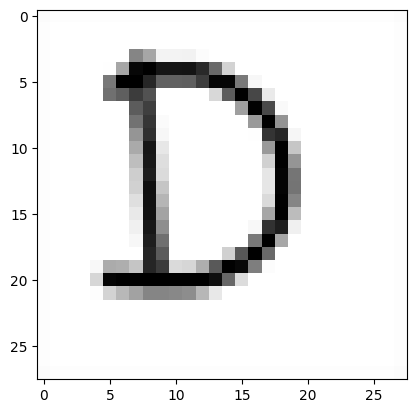

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
				  The letter is probably:
						' E '


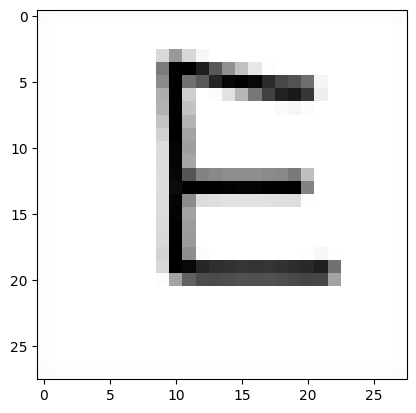

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
				  The letter is probably:
						' P '


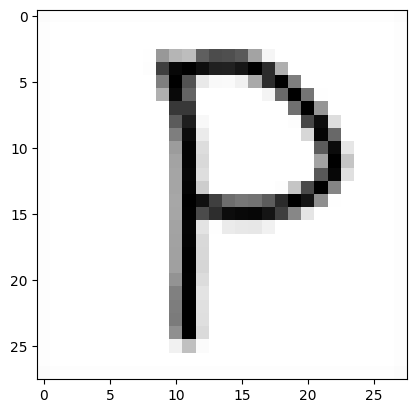

In [49]:
drawing = False
canvas = None
brush_size=16

def draw(event):
    global drawing
    if drawing:
        x, y = event.x, event.y
        canvas.create_oval(x, y, x+brush_size, y+brush_size, fill='black', outline='black')

def brush_size_adjust(event):
    global brush_size
    if event.delta>0:
        brush_size+=4
    else:
        brush_size-=4

    canvas.delete("brush_size_text")
    canvas.create_text(10, 10, text=brush_size, fill='black', width=100, tags="brush_size_text")

def start(event):
    global drawing
    drawing = True

def stop(event):
    global drawing
    drawing = False

def get_image():
    window.update()
    x = window.winfo_rootx() + canvas.winfo_x()
    y = window.winfo_rooty() + canvas.winfo_y()
    x1 = x + canvas.winfo_width()
    y1 = y + canvas.winfo_height()
    img = ImageGrab.grab().crop((x, y, x1, y1))
    img = img.resize((28, 28))
    img = img.convert('L')
    img = np.array(img)
    img = np.invert(img)
    img = img / 255.0
    return img

def predict():
    img = get_image()
    img = np.expand_dims(img, axis=0)
    prediction = alpha_model.predict(img)
    predicted_label = np.argmax(prediction)
    recognized_character = chr(predicted_label + ord('A'))
    print("\t\t\t\t  The letter is probably:\n\t\t\t\t\t\t'", recognized_character, "'")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    clear_canvas()

def clear_canvas():
    canvas.delete("all")

window = Tk()
window.title("Draw a letter.")
canvas = Canvas(window, width=300, height=300, bg="white")
canvas.pack()
canvas.bind("<B1-Motion>", draw)
canvas.bind("<ButtonPress-1>", start)
canvas.bind("<ButtonRelease-1>", stop)
canvas.bind("<MouseWheel>", brush_size_adjust)

predict_button = Button(window, text="PREDICT", command=predict)
predict_button.pack()

output_label = Label(window, text="")
output_label.pack()

window.mainloop()